In [21]:
import numpy as np
import pandas as pd
# import time
# import pytz
# import datetime

In [22]:
# def local_to_utc(local_ts, utc_format='%Y-%m-%dT%H:%M:%SZ'):
#     local_tz = pytz.timezone('Asia/Shanghai')
#     local_format = "%Y-%m-%d %H:%M:%S"
#     time_str = time.strftime(local_format, time.localtime(local_ts))
#     dt = datetime.datetime.strptime(time_str, local_format)
#     local_dt = local_tz.localize(dt, is_dst=None)
#     utc_dt = local_dt.astimezone(pytz.utc)
#     return utc_dt.strftime(utc_format)

In [23]:
df = pd.read_csv("./data.csv")
df.columns = ['Date', 'M2', 'M1']
df['Date'] = df['Date'].astype(np.datetime64)
date = df['Date']
# date = date.map(lambda x: local_to_utc(x))
# df['Date'] = df['Date'].map(lambda x: x.strftime("%Y-%m"))
date = list(date.values)
date

[numpy.datetime64('1996-01-01T00:00:00.000000000'),
 numpy.datetime64('1996-02-01T00:00:00.000000000'),
 numpy.datetime64('1996-03-01T00:00:00.000000000'),
 numpy.datetime64('1996-04-01T00:00:00.000000000'),
 numpy.datetime64('1996-05-01T00:00:00.000000000'),
 numpy.datetime64('1996-06-01T00:00:00.000000000'),
 numpy.datetime64('1996-07-01T00:00:00.000000000'),
 numpy.datetime64('1996-08-01T00:00:00.000000000'),
 numpy.datetime64('1996-09-01T00:00:00.000000000'),
 numpy.datetime64('1996-10-01T00:00:00.000000000'),
 numpy.datetime64('1996-11-01T00:00:00.000000000'),
 numpy.datetime64('1996-12-01T00:00:00.000000000'),
 numpy.datetime64('1997-01-01T00:00:00.000000000'),
 numpy.datetime64('1997-02-01T00:00:00.000000000'),
 numpy.datetime64('1997-03-01T00:00:00.000000000'),
 numpy.datetime64('1997-04-01T00:00:00.000000000'),
 numpy.datetime64('1997-05-01T00:00:00.000000000'),
 numpy.datetime64('1997-06-01T00:00:00.000000000'),
 numpy.datetime64('1997-07-01T00:00:00.000000000'),
 numpy.datet

In [24]:
# 'M2g','M1g','M1g-M2g'
df.insert(3, 'M2g', None)
df.insert(4, 'M1g', None)
df.insert(5, 'M1g-M2g', None)
df = df.set_index('Date')

df['M2g'] = df['M2'].pct_change(periods=12)
df['M1g'] = df['M1'].pct_change(periods=12)
df['M1g-M2g'] = df['M1g'] - df['M2g']

df.fillna(0, inplace=True)

m2g = df['M2g'].map(lambda x: '%.4f' % x).astype(float)
m1g = df['M1g'].map(lambda x: '%.4f' % x).astype(float)
m1g_m2g = df['M1g-M2g'].map(lambda x: '%.4f' % x).astype(float)
m2g = list(m2g.values)
m1g = list(m1g.values)
m1g_m2g = list(m1g_m2g.values)

df['M2'] = df['M2'].map(lambda x: '%.2f' % x)
df['M1'] = df['M1'].map(lambda x: '%.2f' % x)
df['M2g'] = df['M2g'].map(lambda x: format(x, '.2%'))
df['M1g'] = df['M1g'].map(lambda x: format(x, '.2%'))
df['M1g-M2g'] = df['M1g-M2g'].map(lambda x: format(x, '.2%'))

In [26]:
# date

In [30]:
m2g_date = []
for tpl in zip(date, m2g):
    m2g_date.append(list(tpl))

In [31]:
m2g_date

[[numpy.datetime64('1996-01-01T00:00:00.000000000'), 0.0],
 [numpy.datetime64('1996-02-01T00:00:00.000000000'), 0.0],
 [numpy.datetime64('1996-03-01T00:00:00.000000000'), 0.0],
 [numpy.datetime64('1996-04-01T00:00:00.000000000'), 0.0],
 [numpy.datetime64('1996-05-01T00:00:00.000000000'), 0.0],
 [numpy.datetime64('1996-06-01T00:00:00.000000000'), 0.0],
 [numpy.datetime64('1996-07-01T00:00:00.000000000'), 0.0],
 [numpy.datetime64('1996-08-01T00:00:00.000000000'), 0.0],
 [numpy.datetime64('1996-09-01T00:00:00.000000000'), 0.0],
 [numpy.datetime64('1996-10-01T00:00:00.000000000'), 0.0],
 [numpy.datetime64('1996-11-01T00:00:00.000000000'), 0.0],
 [numpy.datetime64('1996-12-01T00:00:00.000000000'), 0.0],
 [numpy.datetime64('1997-01-01T00:00:00.000000000'), 0.3467],
 [numpy.datetime64('1997-02-01T00:00:00.000000000'), 0.2386],
 [numpy.datetime64('1997-03-01T00:00:00.000000000'), 0.2384],
 [numpy.datetime64('1997-04-01T00:00:00.000000000'), 0.2297],
 [numpy.datetime64('1997-05-01T00:00:00.0000

In [38]:
for index in df.index:
    print (index, df.loc[index].values[0], df.loc[index].values[1], 
           df.loc[index].values[2], df.loc[index].values[3])

1996-01 58401.00 25195.00 0.00% 0.00%
1996-02 63778.00 25255.60 0.00% 0.00%
1996-03 64511.00 23909.00 0.00% 0.00%
1996-04 65723.00 24145.00 0.00% 0.00%
1996-05 66880.00 24463.00 0.00% 0.00%
1996-06 68132.00 24600.00 0.00% 0.00%
1996-07 69346.00 25078.00 0.00% 0.00%
1996-08 72309.00 25729.45 0.00% 0.00%
1996-09 69643.00 26230.00 0.00% 0.00%
1996-10 73152.20 26798.20 0.00% 0.00%
1996-11 74142.00 27422.00 0.00% 0.00%
1996-12 76094.90 28514.80 0.00% 0.00%
1997-01 78648.00 30573.00 34.67% 21.35%
1997-02 78998.00 29103.00 23.86% 15.23%
1997-03 79889.00 29058.00 23.84% 21.54%
1997-04 80818.00 29991.00 22.97% 24.21%
1997-05 81151.00 30275.00 21.34% 23.76%
1997-06 82789.00 31074.00 21.51% 26.32%
1997-07 83460.00 31100.00 20.35% 24.01%
1997-08 84746.00 31594.99 17.20% 22.80%
1997-09 85892.00 32245.00 23.33% 22.93%
1997-10 86644.00 32422.00 18.44% 20.99%
1997-11 87590.00 32909.00 18.14% 20.01%
1997-12 90995.30 34826.30 19.58% 22.13%
1998-01 92211.40 35585.60 17.25% 16.40%
1998-02 92024.00 33395.0

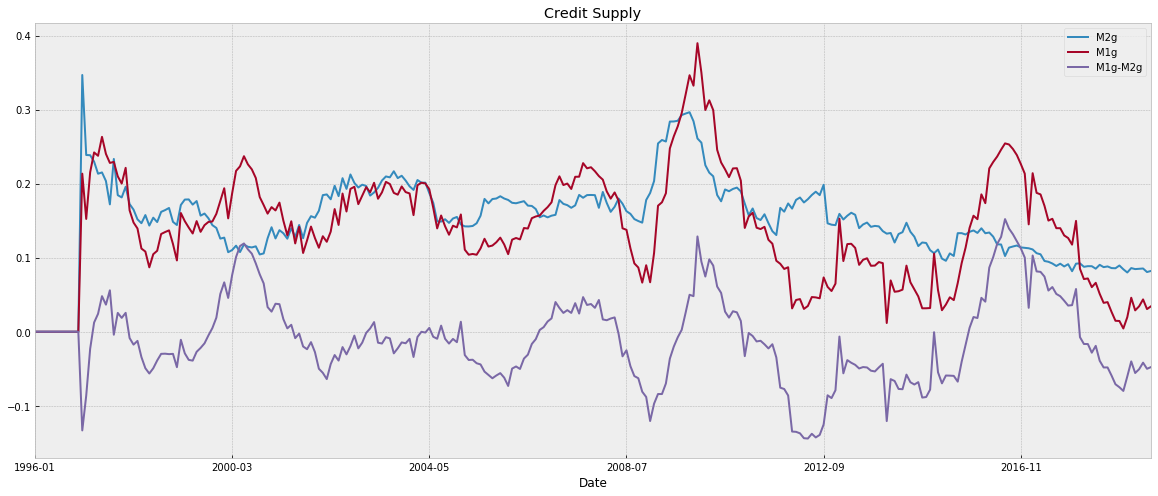

In [9]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
figsize(20, 8)
plt.style.use('bmh')
# plt.style.use('ggplot')

ax1 = df['M2g'].plot(kind='line')
ax2 = df['M1g'].plot(kind='line')
ax3 = df['M1g-M2g'].plot(kind='line')
plt.title("Credit Supply")
plt.legend()

plt.savefig('creditSupply.png')
plt.show()